# Data
The data consists of fluorescence spectra readings from six different species of bacteria: Bacillus cereus, Listeria monocytogenes, Staphylococcus aureus, Salmonella enterica, Escherichia coli, and Pseudomonas aureginosa.
For each bacteria sample there are spectra readings for about 1043 different wavelengths of light and the three growth phases: lag, log, and stat (stationary). This means that for each bacteria sample there are 3 * 1304 data points. Furthermore, the spectra readings are generated with two different integration times (time spent gathering the spectra reading), 16ms and 32ms. 

The labels (or targets) are set to be the species of the given bacteria sample. These are:
- Bacillus Cereus (bc)
- Escherichia Coli (ec)
- Listeria Monocytogenes (lm)
- Pseudomonas Aureginosa (pa)
- Staphylococcus Aureus (sa) 
- Salmonella Enterica (se)

# Models
The models used in the following experiments are:
1. Naive Bayes
2. SVM
3. RandomForest with Decision Stumps
4. RandomForest with Decision Trees
5. AdaBoost with Decision Stumps
6. AdaBoost with Decision Trees
7. XGBoost
8. Convolutional Neural Network

# Methodology
In the code below an experiment refers to a sequence of tests which evaluate the performance of various models. An experiment is run for the entire dataset and again for each subset of the dataset, where a subset is simply the data from a single growth phase. In each experiment I run the same series of tests twice, once for each integration time. 

Each model is evaluated using both the original, untransformed data and a PCA transformed version of the data. Models are evaluated using repeated stratified k-fold cross validation where the data is split into three folds (n_splits) 20 times (n_repeats). The scores given for both the untransformed data and the PCA data consist of the mean score over all the 60 indvidual folds +/- two standard deviations.

The results are a bit hard to read from the text output so the results are summarised at the end in a table and bar chart for each experiment. The CNN scores using the PCA data are all zero because the CNN model is not tested on the PCA transformed data. The numbers on the bars in the bar chart show the height of the bars (the mean classification score) and the black lines show the +/- two standard deviations range. 

The code for these experiments can be found under the file `experiment.py`.

More details about the data, models, and methodology can be found in the file `README.md`.

In [1]:
from experiments.cnn import CNNExperiment as Experiment

In [2]:
experiment_lag = Experiment('lag', n_jobs=4)
experiment_lag.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.41 (+/- 0.18)
PCA Accuracy: 0.29 (+/- 0.17)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 3149 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    6.8s finished


Best grid search score was 0.48 with the following settings: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.50 (+/- 0.19)
PCA Accuracy: 0.48 (+/- 0.19)
Elapsed time: 00m 07s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.47 (+/- 0.10)
PCA Accuracy: 0.46 (+/- 0.09)
Elapsed time: 00m 30s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.43 (+/- 0.17)
PCA Accuracy: 0.45 (+/- 0.16)
Elapsed time: 00m 29s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************
A

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done 607 tasks      | elapsed:   26.0s
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   39.8s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   40.0s finished


Best grid search score was 0.39 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.38 (+/- 0.15)
PCA Accuracy: 0.39 (+/- 0.18)
Elapsed time: 01m 01s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 09m 59s    
Accuracy: 0.45 +/- 0.15
PCA Accuracy: N/A
Elapsed time: 10m 11s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.43 (+/- 0.14)
PCA Accuracy: 0.29 (+/- 0.17)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 2509 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    5.6s finished


Best grid search score was 0.54 with the following settings: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.54 (+/- 0.19)
PCA Accuracy: 0.54 (+/- 0.20)
Elapsed time: 00m 05s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.49 (+/- 0.08)
PCA Accuracy: 0.45 (+/- 0.12)
Elapsed time: 00m 27s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.46 (+/- 0.13)
PCA Accuracy: 0.44 (+/- 0.14)
Elapsed time: 00m 45s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************
A

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done 608 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   40.0s finished


Best grid search score was 0.41 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.36 (+/- 0.18)
PCA Accuracy: 0.41 (+/- 0.17)
Elapsed time: 01m 02s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 05m 34s    
Accuracy: 0.43 +/- 0.11
PCA Accuracy: N/A
Elapsed time: 05m 44s
All tests done.
Elapsed time: 29m 20s


In [3]:
experiment_log = Experiment('log', n_jobs=4)
experiment_log.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.40 (+/- 0.18)
PCA Accuracy: 0.39 (+/- 0.18)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 4642 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    5.1s finished


Best grid search score was 0.50 with the following settings: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.48 (+/- 0.21)
PCA Accuracy: 0.50 (+/- 0.21)
Elapsed time: 00m 05s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.48 (+/- 0.11)
PCA Accuracy: 0.39 (+/- 0.18)
Elapsed time: 00m 40s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.48 (+/- 0.18)
PCA Accuracy: 0.50 (+/- 0.17)
Elapsed time: 00m 51s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************
A

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 744 tasks      | elapsed:   32.4s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   39.9s finished


Best grid search score was 0.43 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.40 (+/- 0.22)
PCA Accuracy: 0.43 (+/- 0.22)
Elapsed time: 00m 48s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 05m 41s    
Accuracy: 0.46 +/- 0.13
PCA Accuracy: N/A
Elapsed time: 05m 48s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.37 (+/- 0.18)
PCA Accuracy: 0.38 (+/- 0.20)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1142 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   11.2s finished


Best grid search score was 0.50 with the following settings: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.48 (+/- 0.23)
PCA Accuracy: 0.50 (+/- 0.25)
Elapsed time: 00m 12s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.47 (+/- 0.12)
PCA Accuracy: 0.36 (+/- 0.16)
Elapsed time: 00m 48s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.44 (+/- 0.20)
PCA Accuracy: 0.39 (+/- 0.23)
Elapsed time: 00m 31s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   37.7s finished


Best grid search score was 0.42 with the following settings: {'learning_rate': 0.01, 'max_depth': 1}
Accuracy: 0.40 (+/- 0.20)
PCA Accuracy: 0.43 (+/- 0.26)
Elapsed time: 00m 58s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 200.
Iteration 60/60 - Epoch 199/200 - Progress: 11999/12000 - Elapsed time: 10m 19s 
Accuracy: 0.44 +/- 0.16
PCA Accuracy: N/A
Elapsed time: 10m 34s
All tests done.
Elapsed time: 26m 27s


In [4]:
experiment_stat = Experiment('stat', n_jobs=4)
experiment_stat.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.41 (+/- 0.18)
PCA Accuracy: 0.33 (+/- 0.18)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 926 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 12626 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   12.0s finished


Best grid search score was 0.50 with the following settings: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.50 (+/- 0.18)
PCA Accuracy: 0.51 (+/- 0.18)
Elapsed time: 00m 12s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.50 (+/- 0.15)
PCA Accuracy: 0.34 (+/- 0.13)
Elapsed time: 00m 51s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.52 (+/- 0.17)
PCA Accuracy: 0.47 (+/- 0.21)
Elapsed time: 00m 56s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 167 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 337 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 587 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 937 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  5.6min finished


Best grid search score was 0.44 with the following settings: {'learning_rate': 0.001, 'max_depth': 2}
Accuracy: 0.41 (+/- 0.23)
PCA Accuracy: 0.44 (+/- 0.19)
Elapsed time: 06m 11s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 08m 24s    
Accuracy: 0.44 +/- 0.13
PCA Accuracy: N/A
Elapsed time: 08m 36s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.42 (+/- 0.20)
PCA Accuracy: 0.35 (+/- 0.21)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1222 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   13.7s finished


Best grid search score was 0.56 with the following settings: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.59 (+/- 0.19)
PCA Accuracy: 0.56 (+/- 0.19)
Elapsed time: 00m 15s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.51 (+/- 0.15)
PCA Accuracy: 0.42 (+/- 0.15)
Elapsed time: 00m 54s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.52 (+/- 0.16)
PCA Accuracy: 0.44 (+/- 0.19)
Elapsed time: 00m 58s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 352 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 852 tasks      | elapsed:   41.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   45.9s finished


Best grid search score was 0.43 with the following settings: {'learning_rate': 0.0001, 'max_depth': 1}
Accuracy: 0.41 (+/- 0.26)
PCA Accuracy: 0.44 (+/- 0.18)
Elapsed time: 01m 08s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 08m 22s    
Accuracy: 0.47 +/- 0.12
PCA Accuracy: N/A
Elapsed time: 08m 30s
All tests done.
Elapsed time: 35m 38s


In [5]:
experiment_all = Experiment('all', n_jobs=4)
experiment_all.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.55 (+/- 0.16)
PCA Accuracy: 0.37 (+/- 0.16)
Elapsed time: 00m 01s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1202 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   12.5s finished


Best grid search score was 0.58 with the following settings: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.59 (+/- 0.14)
PCA Accuracy: 0.59 (+/- 0.14)
Elapsed time: 00m 14s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.57 (+/- 0.16)
PCA Accuracy: 0.45 (+/- 0.14)
Elapsed time: 00m 53s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.58 (+/- 0.18)
PCA Accuracy: 0.58 (+/- 0.17)
Elapsed time: 00m 33s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
*********************************************************************

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 352 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 852 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   42.7s finished


Best grid search score was 0.54 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.54 (+/- 0.29)
PCA Accuracy: 0.54 (+/- 0.21)
Elapsed time: 01m 25s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 07m 01s    
Accuracy: 0.56 +/- 0.19
PCA Accuracy: N/A
Elapsed time: 07m 11s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.58 (+/- 0.18)
PCA Accuracy: 0.39 (+/- 0.20)
Elapsed time: 00m 01s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1002 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   12.7s finished


Best grid search score was 0.59 with the following settings: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.59 (+/- 0.11)
PCA Accuracy: 0.59 (+/- 0.11)
Elapsed time: 00m 14s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.57 (+/- 0.14)
PCA Accuracy: 0.39 (+/- 0.16)
Elapsed time: 00m 54s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.59 (+/- 0.18)
PCA Accuracy: 0.53 (+/- 0.16)
Elapsed time: 00m 39s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************
A

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  74 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 674 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   36.5s finished


Best grid search score was 0.49 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.51 (+/- 0.23)
PCA Accuracy: 0.49 (+/- 0.17)
Elapsed time: 00m 59s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 03m 18s    
Accuracy: 0.55 +/- 0.20
PCA Accuracy: N/A
Elapsed time: 03m 22s
All tests done.
Elapsed time: 28m 21s


Results for Tests Run on Lag Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              32ms                   svm  original       0.54      0.19
1              32ms                   svm       pca       0.54      0.20
2              16ms                   svm  original       0.50      0.19
3              32ms  random_forest_stumps  original       0.49      0.08
4              16ms                   svm       pca       0.48      0.19
5              16ms  random_forest_stumps  original       0.47      0.10
6              16ms  random_forest_stumps       pca       0.46      0.09
7              32ms         random_forest  original       0.46      0.13
8              32ms  random_forest_stumps       pca       0.45      0.12
9              16ms                   cnn  original       0.45      0.15
10             16ms         random_forest       pca       0.45      0.16
11             32ms         random_forest       pca     

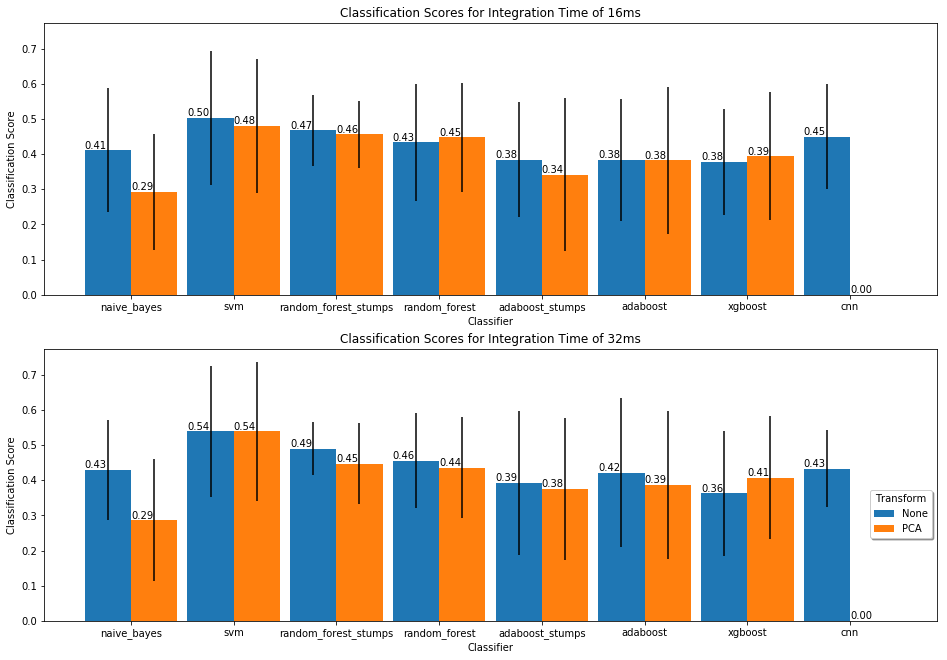

In [6]:
print('Results for Tests Run on Lag Growth Phase Data')

print('Top Configurations:\n', experiment_lag.top_configurations(-1))
experiment_lag.plot_results();

Results for Tests Run on Log Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              16ms         random_forest       pca       0.50      0.17
1              16ms                   svm       pca       0.50      0.21
2              32ms                   svm       pca       0.50      0.25
3              16ms  random_forest_stumps  original       0.48      0.11
4              16ms         random_forest  original       0.48      0.18
5              16ms                   svm  original       0.48      0.21
6              16ms              adaboost       pca       0.48      0.23
7              32ms                   svm  original       0.48      0.23
8              32ms  random_forest_stumps  original       0.47      0.12
9              16ms                   cnn  original       0.46      0.13
10             16ms       adaboost_stumps       pca       0.46      0.19
11             16ms              adaboost  original     

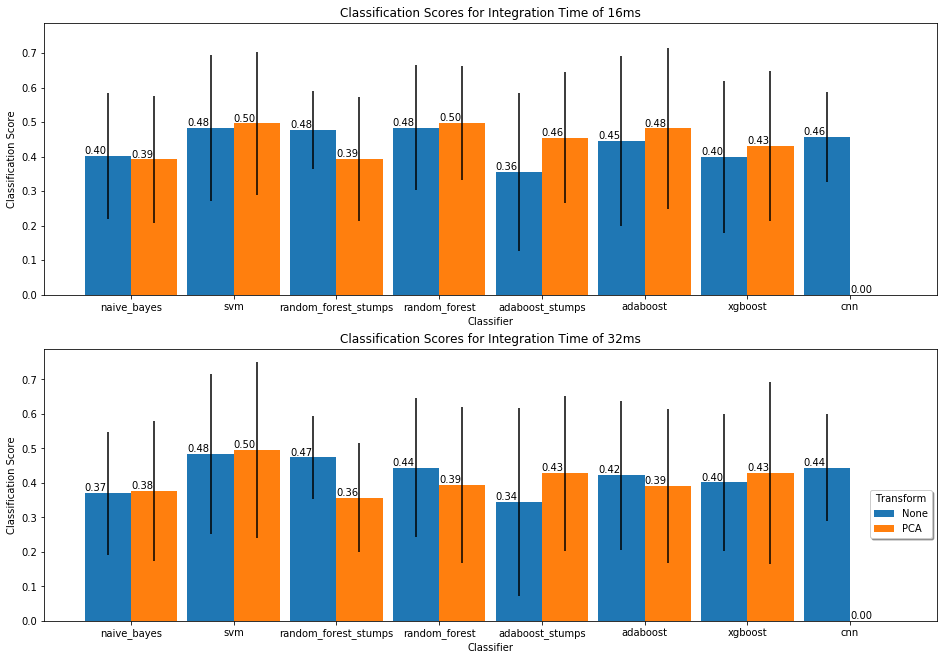

In [7]:
print('Results for Tests Run on Log Growth Phase Data')

print('Top Configurations:\n', experiment_log.top_configurations(-1))
experiment_log.plot_results();

Results for Tests Run on Stationary Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              32ms                   svm  original       0.59      0.19
1              32ms                   svm       pca       0.56      0.19
2              32ms         random_forest  original       0.52      0.16
3              16ms         random_forest  original       0.52      0.17
4              32ms  random_forest_stumps  original       0.51      0.15
5              16ms                   svm       pca       0.51      0.18
6              16ms  random_forest_stumps  original       0.50      0.15
7              16ms                   svm  original       0.50      0.18
8              32ms                   cnn  original       0.47      0.12
9              16ms         random_forest       pca       0.47      0.21
10             32ms              adaboost  original       0.46      0.20
11             16ms                   cnn  origin

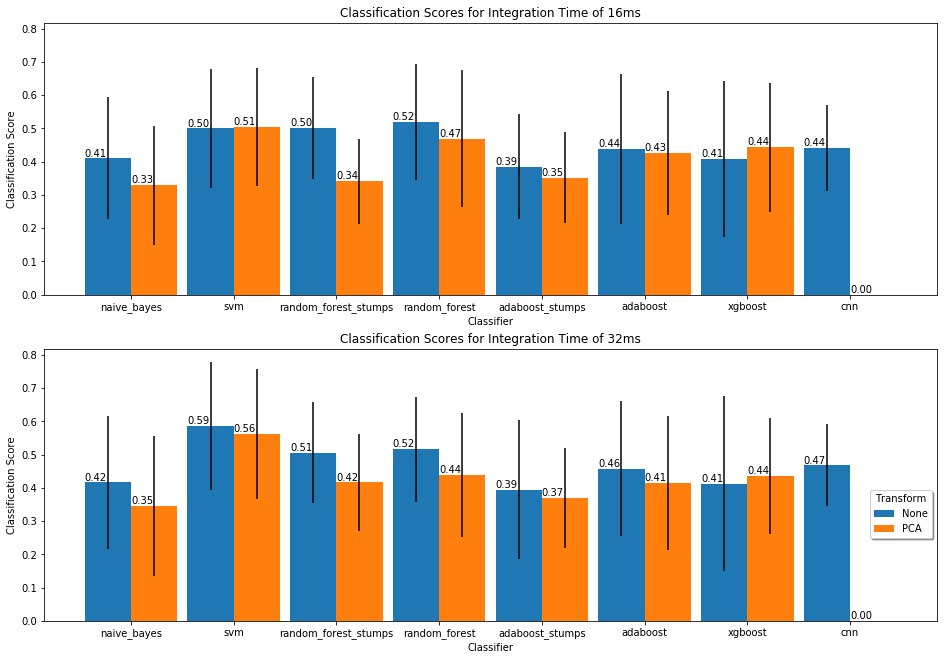

In [8]:
print('Results for Tests Run on Stationary Growth Phase Data')

print('Top Configurations:\n', experiment_stat.top_configurations(-1))
experiment_stat.plot_results();

Results for Tests Run on All Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              32ms                   svm  original       0.59      0.11
1              32ms                   svm       pca       0.59      0.11
2              16ms                   svm  original       0.59      0.14
3              16ms                   svm       pca       0.59      0.14
4              32ms         random_forest  original       0.59      0.18
5              16ms         random_forest       pca       0.58      0.17
6              16ms         random_forest  original       0.58      0.18
7              32ms           naive_bayes  original       0.58      0.18
8              32ms  random_forest_stumps  original       0.57      0.14
9              16ms  random_forest_stumps  original       0.57      0.16
10             16ms                   cnn  original       0.56      0.19
11             16ms           naive_bayes  original     

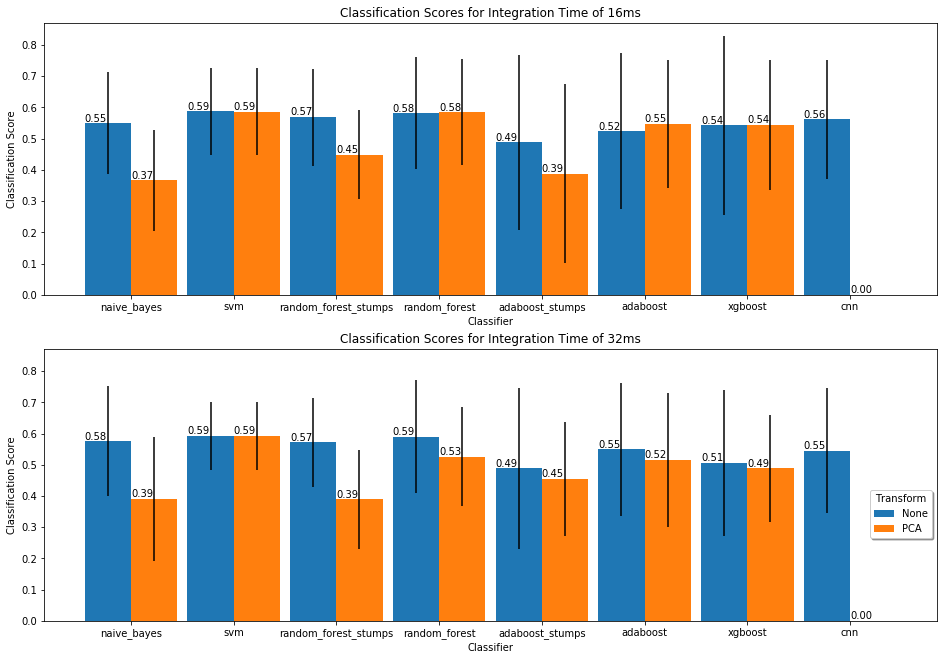

In [9]:
print('Results for Tests Run on All Growth Phase Data')

print('Top Configurations:\n', experiment_all.top_configurations(-1))
experiment_all.plot_results();